In [1]:
import matplotlib
matplotlib.use('TkAgg')
#matplotlib.use('Qt5Agg')
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np
import smallest_enclosing_circle as sec

https://nube.df.uba.ar/index.php/s/4m7rJFYCcPbT9XK#pdfviewer

## Actividad 1.1
### (a)
Obtener las dimensiones de los objetos de la imagen “vil_metal.png”. Tratar de determinar lacalibración pixel/mm a partir de la regla ubicada en la parte inferior usando alguna(s) de las he-rramientas repasadas en clase, como binarización, filtros detectores de bordes, etc. Con estacalibración, obtener el diámetro de las monedas. 
Pensar estos puntos para la presentación: 

◦Cuál es el diámetro (cómo asegurar que el segmento elegido es el que pasa por el centro)?◦Qué pasa con la sombra de la imagen?

◦Qué incerteza se le puede asignar a esa determinación?La imagen también está en el paquete de las imágenes que se usaron durante la clase.

#### Visualizamos la imagen
Utilizamos el gradiente de rojos porque nos pareicio el mas apropiado

In [2]:
AA = imageio.imread('data/vil_metal.png')

In [3]:
colors = ['Red','Green','Blue']
image_dict = {k: np.array(AA[:,:,i])  for i,k in enumerate(colors)}

Text(0.5, 1.0, 'Red channel image in Red')

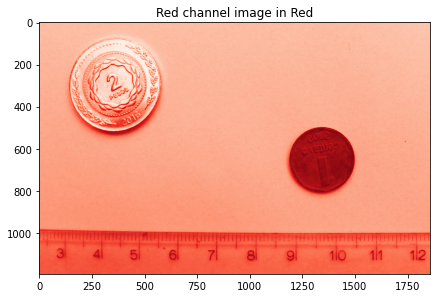

In [4]:
#probamos con rojo porque es donde hay mayor contraste entre el fondo de la regla y el milimetrado

%matplotlib inline

color = 'Red'
A = image_dict[color]
plt.figure(figsize = (7, 6))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')

#### Filtro de Sobel
Aplicamos el filtro de Sobel para quedarnos con los bordes de la imagen

In [5]:
#Utilizamos el operador Sobel
s_x = [[1, 2, 1],[0, 0, 0],[-1, -2, -1]]
s_y = np.transpose(s_x)

In [6]:
#Calculo la convolucion
x_conv = signal.convolve2d(A, s_x)
y_conv = signal.convolve2d(A, s_y)
R = np.sqrt(x_conv**2 + y_conv**2)

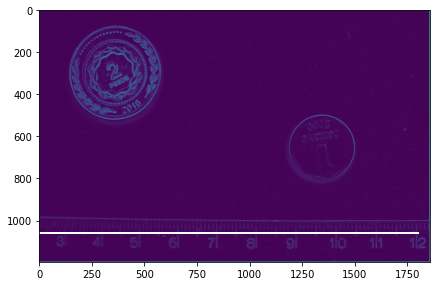

In [7]:
#cgrafica dicha convolución
%matplotlib inline
plt.figure(figsize = (7, 6))
plt.plot([1,1800], [1060,1060], 'white', lw=2)
plt.imshow(R)
#noto que necesita que se rote

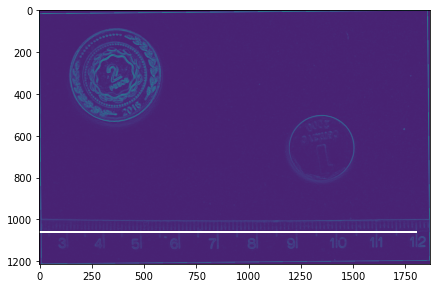

In [8]:
#roto 0.5 grados
%matplotlib inline
R2 = ndimage.rotate(R, 0.5)
#se grafica la imagen modificada
plt.figure(figsize = (7, 6))
plt.plot([1,1800], [1060,1060], 'white', lw=2)
plt.imshow(R2)

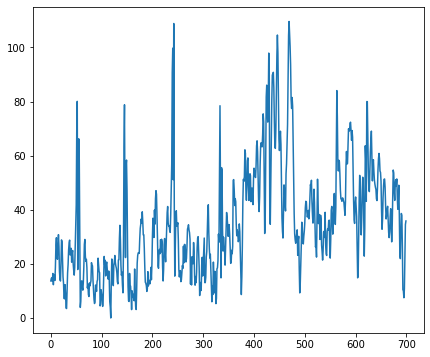

In [9]:
perf2 = R2[1060, 800:1500]
plt.figure(figsize = (7, 6))
plt.plot(perf2)
#rari detectar ahi

Graficamos el perfil de la imagen orignal a ver si se diferencian mejor las lineas

In [10]:
%matplotlib qt
perf = A[1060, 800:1500]
plt.figure(figsize = (7, 6))
plt.plot(perf)
x = np.array(plt.ginput(8))[:,0]

In [11]:
diff_x = np.diff(x)

# Promedio de los valores
escala = np.mean( diff_x )/5 #son los valores de pixeles cada 5mm
escala_error = np.std(  diff_x )

print(f'Escala: ( {escala}  ± {escala_error}  ) px/mm')

Escala: ( 18.919911012235822  ± 1.0686135826127998  ) px/mm


Text(0, 0.5, 'Y [mm]')

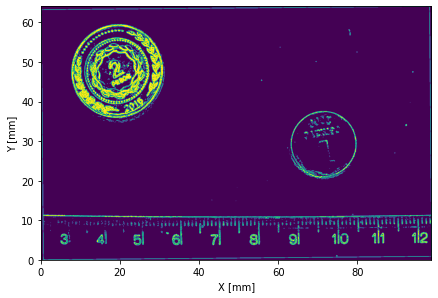

In [12]:
%matplotlib inline
#Seleccionamos los índices donde img_rotada tiene un valor mayor a 55
indices_mayores_a_55 = (R2 > 55)

# Creamos una imagen del mismo tamaño pero vacía
img_binarizada       = np.zeros( R2.shape )

# Ponemos 1 en los lugares donde img_rotada era mayor a 55
img_binarizada[indices_mayores_a_55  ] = 1

eje_y = np.arange(  R2.shape[0] ) / escala
eje_x = np.arange(  R2.shape[1] ) / escala


plt.figure(figsize = (7,6)) 
plt.imshow(  img_binarizada, extent=[ eje_x.min(), eje_x.max(), eje_y.min(), eje_y.max()]  )

plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

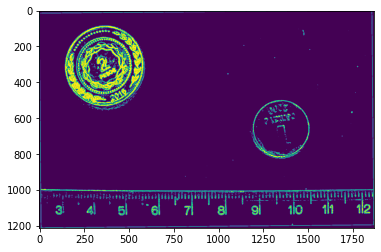

In [13]:
R3=(R2>50); # elijo un umbral de binarización
B3b=R3.astype(float); # vuelvo a  convertir la matriz a punto flotante
fig, ax = plt.subplots()
ax.imshow(B3b) 

Ahora que ya tenemos la escala, podemos calcular los diámetros con la imagen que mayor contraste tenga entre el fondo y las monedas. Utilizamos el canal azul y la rotamos lo mismo que la original así calculamos la distancia en la misma base.

Text(0.5, 1.0, 'Blue channel image in Blue')

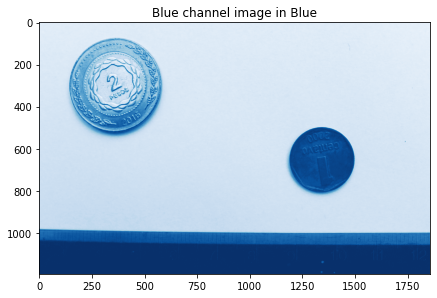

In [14]:
%matplotlib inline

color2 = 'Blue'
A2 = image_dict[color2]
plt.figure(figsize = (7, 6))
plt.imshow(A2, cmap=plt.cm.Blues_r)
plt.title(f'{color2} channel image in {color2}')

In [15]:
#Calculo la convolucion
x_conv2 = signal.convolve2d(A2, s_x)
y_conv2 = signal.convolve2d(A2, s_y)
R2 = np.sqrt(x_conv2**2 + y_conv2**2)
R2 = ndimage.rotate(R2, 0.5)

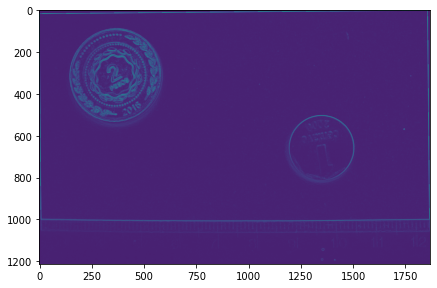

In [16]:
%matplotlib inline
plt.figure(figsize = (7, 6))
plt.imshow(R2)

In [49]:

%matplotlib qt
R3=(R2>35); # elijo un umbral de binarización
B3b=R3.astype(float); # vuelvo a  convertir la matriz a punto flotante
fig, ax = plt.subplots()
ax.imshow(B3b) 
puntos = np.array(plt.ginput(10))

Utilizamos la implementacion de Nayuki$^{[1]}$ para resolver el problema del círculo envolvente mínimo$^{[2]}$.
Para calcular la propagación del error instrumental (se indica a mano los puntos del círculo), utilizamos la librería uncertainties.

[1] https://www.nayuki.io/res/smallest-enclosing-circle/
[2] https://es.wikipedia.org/wiki/Problema_del_c%C3%ADrculo_m%C3%ADnimo

In [75]:
import smallest_enclosing_circle as sec #algoritmo para caluclar el minimo circulo
err_instrumental = 0.5 #error al insertar los puntos manualmente

#para calcular la propacion del error del algoritmo
x_center, y_center, radio = sec.make_circle(puntos)

from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
escala_con_error = ufloat(escala, escala_error)
radio_con_error = ufloat(radio, err_instrumental) #no pudimos calcular la 
print(f'El diametro de la moneda de 2 pesos es {radio_con_error*2/escala_con_error}mm')
escala_con_error

El diametro de la moneda de 2 pesos es 23.7+/-1.3mm


18.919911012235822+/-1.0686135826127998

Vamos a aplicar un metodo alternativo. Creo perfiles horizontales que van desde abajo hasta arriba en una seccion estrategica de la imagen, en esas lineas veo cual es el primer y el ultimo pixel con valor uno y mido la distancia entre ellos, estos valores los guardo y luego veo cual es el maximo de ellos. La maxima distancia es la que corresponde al diametro. Este metodo no es tan bueno ya que puede tomar valores generados por sombras. 

In [70]:
R4=(R2>37); # elijo otro umbral de binarización
B4b=R4.astype(float); # vuelvo a  convertir la matriz a punto flotante 

val=[] #Lista con los valores
for i in range(600):
    perfil=R4[40+i,100:700]
    val_min = 1000 #Elijo una cota superior
    val_max = 0    #Elijo una cota inferior
    for j in range(len(perfil)):
        c=len(perf3)-1-j # j cuenta desde el primer pixel y c cuenta desde el ultimo pixel
        if perfil[c]==True and j<val_min: #Se va a quedar con el primer valor que de 1
            val_min=j
        if perfil[c]==True and c>val_max: #Se va a quedar con el ultimo valor que de 1
            val_max=c
    if val_max-val_min==-1000:
        val.append(0)
    else:
        val.append(val_max - val_min) #Agrega el valor a la lista

m = max(val)
diam = m/escala
diam_err = m/(escala**2)*escala_error

print(f'El diametro es {diam} ± {diam_err} mm')


El diametro es 23.83732141807278 ± 1.3463533429933068 mm


In [74]:
help(sec.make_diameter)

Help on function make_diameter in module smallest_enclosing_circle:

make_diameter(a, b)



### (b) 
Tomar una o dos fotos con celular o cámara e intentar algún tipo de procesamiento de la ima-gen: por ejemplo eliminar una estructura periódica de una imagen (mosquitero, reja, etc), mediralgún tamaño típico a partir de una grilla de calibración, contar objetos (lentejas, porotos, ho-jas), filtrar por promediado, detectar bordes, etc.

## Actividad 1.2
### (a)
Calcular cuánto se estira un tornillo de acero de 6 mm de diámetro y 25 mm de largo si se lecuelga una masa de 100 kg de su extremo inferior (ver la figura). copia comprimida de la imagen "vil_metal.png"

Usar la ley de Hooke,ΔL=LF/EA, dondeL es la longitud en reposo del material, F lafuerza   ejercida,  E  el   módulo   de   Young   y  A  la   sección   (área   transversal)   de   la   pieza(E≈20.6×1010N/m2). 

### (b)
Si el límite elástico del acero es de 5.5×108N/m2cuál es la máxima carga que se puedeaplicar sobre ese tornillo, antes de que se empiece a deformar en forma permanente? (ojo,tiene las mismas unidades que el módulo de Young pero no es!) Para calcular esta cargamáxima, este límite elástico define una carga máxima por unidad de área (la sección de lapieza):   a   una   barra   de  1m2  de   sección   le   puedo   aplicar   una   tensión   máxima   de5.5×108N, que es un montón (pero claro, la barra tiene 1m×1mde sección!!)